In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [13]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14340\2338556962.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
Station = Base.classes.station
Measurement= Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
Most_Recent_Date = session.query(func.max(Measurement.date)).first()
Most_Recent_Date

('2017-08-23',)

In [20]:
Most_Recent_Date_Str = Most_Recent_Date[0]
Most_Recent_Date_Str

'2017-08-23'

In [22]:
# Convert the most recent date string to a datetime object
most_recent_date = datetime.strptime(Most_Recent_Date_Str, '%Y-%m-%d')
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [25]:
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - timedelta(days = 365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [26]:
one_year_ago_formatted = one_year_ago.strftime("%Y-%m-%d")
one_year_ago_formatted

'2016-08-23'

In [27]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_formatted).all()
for row in results[:15]:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)


In [30]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
pandas_df = pd.DataFrame(results,columns=['date','precipitation'])
pandas_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [34]:
# Converting the 'date' column to datetime format
pandas_df['date'] = pd.to_datetime(pandas_df['date'])
pandas_df['date']

0      2016-08-23
1      2016-08-24
2      2016-08-25
3      2016-08-26
4      2016-08-27
          ...    
2225   2017-08-19
2226   2017-08-20
2227   2017-08-21
2228   2017-08-22
2229   2017-08-23
Name: date, Length: 2230, dtype: datetime64[ns]

In [35]:
# Sort the dataframe by date
pandas_df = pandas_df.sort_values(by='date')
pandas_df

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


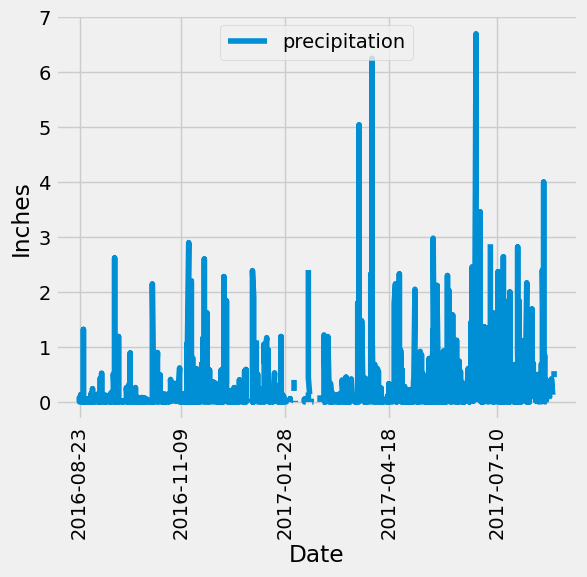

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(6,5))
plt.plot(pandas_df['date'],df['precipitation'], linestyle = '-', label= 'precipitation')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.legend(loc='upper center')
specific_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(pd.to_datetime(specific_dates), rotation=90)

plt.show()

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics= pandas_df['precipitation'].describe()

summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
Total_station = session.query(func.count(Station.station)).all()
Total_station

[(9,)]

In [55]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

Temperature_statistics = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('avg_temp')
).filter(Measurement.station == most_active_station).first()
print([Temperature_statistics])

[(54.0, 85.0, 71.66378066378067)]


In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_month_temprature =  session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.station == most_active_station,
    Measurement.date >= one_year_ago_formatted
).all()

last_12_month_temprature

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [62]:
last_12_month_temprature_pandas_dataframe = pd.DataFrame(last_12_month_temprature)
last_12_month_temprature_pandas_dataframe

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


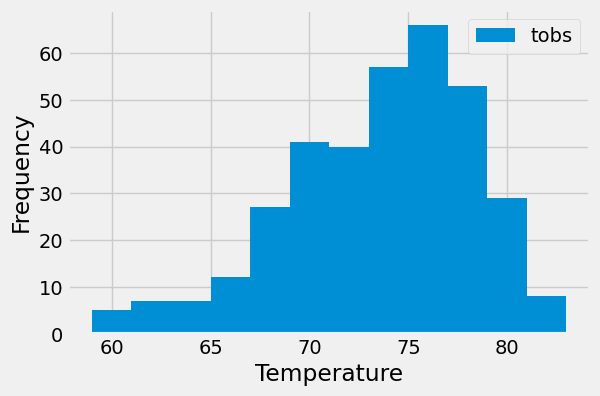

In [63]:
# Plot the results as a histogram
plt.figure(figsize=(6,4))
plt.hist(last_12_month_temprature_pandas_dataframe['tobs'],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(['tobs'], loc='upper right')
plt.show()

# Close Session

In [64]:
# Close Session
session.close()